# Obtain Data

The first step in the Naive Bayes analysis is to read in the data pickle with all newly generated features.

In [3]:
# import pandas and numpy for data manipulation and searching
import pandas as pd 
import numpy as np
# read in data with generated features from a 'pickle'
test=pd.read_pickle('data.pkl')
pd.set_option('max_columns', None) # this allows for all columns to be displayed
test # look at the data

,gameid,playid,team,x,y,s,a,dis,orientation,dir,nflid,displayname,jerseynumber,season,yardline,quarter,gameclock,possessionteam,down,distance,fieldposition,homescorebeforeplay,visitorscorebeforeplay,nflidrusher,offenseformation,offensepersonnel,defendersinthebox,defensepersonnel,playdirection,timehandoff,timesnap,yards,playerheight,playerweight,playerbirthdate,playercollegename,position,hometeamabbr,visitorteamabbr,week,stadium,location,stadiumtype,turf,gameweather,temperature,humidity,windspeed,winddirection,age,time_since_snap,rusher,rushx,rushy,disttorush,teamidentity,min_distancetorusher,ol_d,dl,lb,db,rb_d,qb,ol,rb,te,wr,dl_o,lb_o,db_o,yardfromowngoal,x_standard,y_standard,runsuccess,temp,avgyardspergame,mean_yards_per_rush,x_handoff,y_handoff,1_sec_x,1_5_sec_x,2_sec_x,2_5_sec_x,3_sec_x,3_5_sec_x,4_sec_x,4_5_sec_x,5_sec_x,5_5_sec_x,6_sec_x,1_sec_y,1_5_sec_y,2_sec_y,2_5_sec_y,3_sec_y,3_5_sec_y,4_sec_y,4_5_sec_y,5_sec_y,5_5_sec_y,6_sec_y,offense,eff_downfield_acc,eff_crossfield_acc,rushteamwinning,playerblocked,total_playersblocked,total_playersblocked_revised,yards_binned
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,278.01,272.82,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,72,212,1988-12-29,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,29,1,0,78.75,30.53,6.480872,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,46.09,18.493333,1,2017090700KC,5.557692,4.301493,46.200942,16.241064,46.200942,46.277261,46.367479,46.471595,46.589610,46.721523,46.867335,47.027045,47.200654,47.388162,47.589568,16.241064,14.691693,12.860163,10.746476,8.350631,5.672628,2.712467,0.000000,0.000000,0.000000,0.000000,0,0.055594,-1.128632,0,0,11,11,8 to 10
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,332.39,251.30,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,75,288,1989-03-25,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,28,1,0,78.75,30.53,4.593310,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,45.33,20.693333,1,2017090700KC,5.557692,4.301493,44.978929,19.656138,44.978929,44.641083,44.195030,43.640770,42.978304,42.207630,41.328750,40.341663,39.246369,38.042867,36.731160,19.656138,18.658015,17.340209,15.702719,13.745546,11.468689,8.872149,5.955925,2.720018,0.000000,0.000000,0,-0.432828,-1.278734,0,0,11,11,8 to 10
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,356.99,247.27,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,75,270,1989-01-21,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,28,1,0,78.75,30.53,5.448982,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,46.00,20.133333,1,2017090700KC,5.557692,4.301493,45.414621,18.735994,45.414621,45.036442,44.601272,44.109109,43.559953,42.953805,42.290665,41.570533,40.793408,39.959291,39.068181,18.735994,17.833258,16.794477,15.619652,14.308782,12.861868,11.278909,9.559905,7.704857,5.713764,3.586627,0,-0.227970,-0.544178,0,0,11,11,8 to 10
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,0.23,344.36,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,75,245,1982-11-22,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,35,1,0,78.75,30.53,7.820038,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,48.54,25.633333,1,2017090700KC,5.557692,4.301493,49.204452,25.447315,49.204452,49.731681,50.388911,51.176143,52.093376,53.140611,54.317848,55.625086,57.062325,58.629566,60.326809,25.447315,25.299713,25.1

# Scrub Data

The data set must be scrubbed for null values, however those entries cannot be dropped because the data must maintain
its shape.

In [4]:
# find na's, looks like between 23 and 28 rows contain an NA 
pd.set_option('display.max_rows', 109) # allow for all rows to be displayed 
test.isna().sum() # sums na's by column

gameid                               0
playid                               0
team                                 0
x                                    0
y                                    0
s                                    0
a                                    0
dis                                  0
orientation                         23
dir                                 28
nflid                                0
displayname                          0
jerseynumber                         0
season                               0
yardline                             0
quarter                              0
gameclock                            0
possessionteam                       0
down                                 0
distance                             0
fieldposition                     8602
homescorebeforeplay                  0
visitorscorebeforeplay               0
nflidrusher                          0
offenseformation                    88
offensepersonnel         

Naive bayes requires non-negative numeric features so all other columns need to be removed from the data

In [5]:
# drop non-numeric, negative, irrelevant and incomplete columns
test1= test.drop(columns=['eff_downfield_acc',
                          'gameid',
                          'playid',
                          'runsuccess',
                          'eff_crossfield_acc',
                        'jerseynumber',
                         'stadiumtype',
                         'team',
                         'displayname',
                         'gameclock',
                         'location',
                         'possessionteam',
                         'fieldposition',
                         'nflidrusher',
                         'nflid',
                         'offenseformation',
                         'offensepersonnel',
                         'defensepersonnel',
                         'playdirection',
                         'timehandoff',
                         'timesnap',
                         'playerheight',
                         'playerweight',
                         'playerbirthdate',
                         'temp',
                         'yards',
                         'playercollegename',
                         'position',
                         'hometeamabbr',
                         'visitorteamabbr',
                         'stadium',
                         'turf',
                         'gameweather',
                         'windspeed',
                         'temperature',
                         'humidity',
                         'winddirection',
                         'age',
                         'teamidentity'])
test1= test1.fillna(0) # rather than dropping the remaining NA's they will be replaced with 0 to ensure consistent format
test= test.fillna(0)

# Create the Training and Test Set

The training set will include seasons 2017 and 2018, the test set includes the 2019 season.

In [6]:
# separate data by season, train with 2017, 2018 test with 2019
s2k17= test1[test1['season']==2017]
s2k18= test1[test1['season']==2018]
s2k19= test1[test1['season']==2019]

Now I need to isolate the predicted variable, yards_binned, from the training and test sets.

In [7]:
# create training and test sets, separate what we want to predict, yards_binned
training= pd.concat([s2k17,s2k18])
testing= s2k19
train_bins= training['yards_binned']
test_bins= testing['yards_binned']
training= training.drop(columns=['yards_binned'])
testing= testing.drop(columns=['yards_binned'])

# Multinomial Naive Bayes

The first step in the process is to train the data on the training set, and establish a training score

In [8]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
multi= MultinomialNB() # instantiate
multi.fit(training, train_bins) # train
multi.score(training, train_bins) # score the training set

0.14803771171644806

Next is to find the results by using trained Naive Bayes model to predict yards binned.
To further explore the results a confusion matrix and classification report were generated

In [9]:
# import confusion matrix and classification report metrics to visualize the results in greater depth
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
pred1=multi.predict(testing) # predict test labels
score1=multi.score(testing, test_bins) # score the model
cm1= confusion_matrix(test_bins, pred1, labels=['-10 or less', #the confusion matrix compares the predictions for each bin to the actual values
                                                '-9 to -4',
                                                '-3 to -1',
                                                '0 to 3',
                                                '4 to 7', 
                                                '8 to 10',
                                                '11 to 15',
                                                '16 to 25', 
                                                '26+'])
cr1= classification_report(test_bins, pred1, labels= ['-10 or less', # the classification report shows in depth accuracy metrics of the model
                                                      '-9 to -4',
                                                      '-3 to -1',
                                                      '0 to 3',
                                                      '4 to 7',
                                                      '8 to 10',
                                                      '11 to 15', 
                                                      '16 to 25', 
                                                      '26+'])
# print results
print('Score: \n', score1)
print('Matrix: \n', cm1)
print('Classification Report: \n', cr1)


Score: 
 0.14827254164926446
Matrix: 
 [[   19    26     0    12     1     0     0     0     8]
 [  695   673     6   754    25    46     7     4   562]
 [ 3231  3303    57  4139   120   258    18    29  2903]
 [19187 19241   304 23455   856  1640   129   142 15500]
 [11526 10807   184 12597   548   995    89   105  9877]
 [ 3553  2704    44  3031   147   283    29    30  2785]
 [ 2255  1844    42  2221    96   194    16    19  1981]
 [ 1329  1293    30  1151    44   117    11    14   983]
 [  790   375    11   319    17    45     3    12   496]]
Classification Report: 
               precision    recall  f1-score   support

 -10 or less       0.00      0.29      0.00        66
    -9 to -4       0.02      0.24      0.03      2772
    -3 to -1       0.08      0.00      0.01     14058
      0 to 3       0.49      0.29      0.37     80454
      4 to 7       0.30      0.01      0.02     46728
     8 to 10       0.08      0.02      0.03     12606
    11 to 15       0.05      0.00      0.00

In [10]:
# correlation matrix with yards binned
import matplotlib.pyplot as plt
import seaborn as sn
corr_set=test.loc[:,["yards",
                     "yards_binned",
                     "eff_downfield_acc",
                     "eff_crossfield_acc",
                     "total_playersblocked_revised",
                     "disttorush",
                     "rushteamwinning",
                     "min_distancetorusher",
                     "yardfromowngoal",
                     "defendersinthebox",
                     "windspeed",
                     "temperature",
                    "humidity"]]
corr_figs= corr_set.corr()
fig, ax = plt.subplots(figsize=(12,12))
sn.heatmap(corr_figs, square=True, linewidths= .5, cmap="Greens", annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x1200 with 2 Axes>

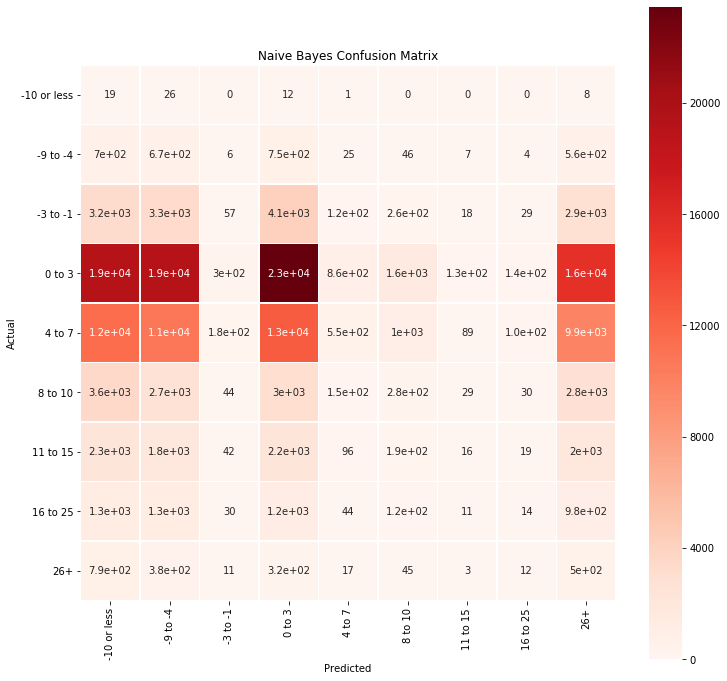

In [11]:
fig, ax = plt.subplots(figsize=(12,12))
sn.heatmap(cm1, square=True, cmap="Reds" , linewidths=0.5, annot=True, 
                       xticklabels=['-10 or less','-9 to -4','-3 to -1','0 to 3','4 to 7','8 to 10','11 to 15', '16 to 25', '26+'],
                       yticklabels=['-10 or less','-9 to -4','-3 to -1','0 to 3','4 to 7','8 to 10','11 to 15', '16 to 25', '26+'])
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [24]:
prob_sorted_0 = multi.feature_log_prob_[0, :].argsort()
prob_sorted_1 = multi.feature_log_prob_[1, :].argsort()
prob_sorted_2 = multi.feature_log_prob_[2, :].argsort()
prob_sorted_3 = multi.feature_log_prob_[3, :].argsort()
prob_sorted_4 = multi.feature_log_prob_[4, :].argsort()
prob_sorted_5 = multi.feature_log_prob_[5, :].argsort()
prob_sorted_6 = multi.feature_log_prob_[6, :].argsort()
prob_sorted_7 = multi.feature_log_prob_[7, :].argsort()
prob_sorted_8 = multi.feature_log_prob_[8, :].argsort()
col_list=training.columns.values
print('Features of -10 or less bin: \n',np.take(col_list, prob_sorted_0[:5]))
print('Features of -9 to -4 bin: \n',np.take(col_list, prob_sorted_1[:5]))
print('Features of -3 to -1 bin: \n',np.take(col_list, prob_sorted_2[:5]))
print('Features of 0 to 3 bin: \n',np.take(col_list, prob_sorted_3[:5]))
print('Features of 4 to 7 bin: \n',np.take(col_list, prob_sorted_4[:5]))
print('Features of 8 to 10 bin: \n',np.take(col_list, prob_sorted_5[:5]))
print('Features of 11 to 15 bin: \n',np.take(col_list, prob_sorted_6[:5]))
print('Features of 16 to 25 bin: \n',np.take(col_list, prob_sorted_7[:5]))
print('Features of 26+ bin: \n',np.take(col_list, prob_sorted_8[:5]))

Features of -10 or less bin: 
 ['db_o' 'ol_d' 'rb_d' 'lb_o' 'rusher']
Features of -9 to -4 bin: 
 ['rb_d' 'lb_o' 'db_o' 'ol_d' 'dl_o']
Features of -3 to -1 bin: 
 ['db_o' 'rb_d' 'ol_d' 'lb_o' 'dl_o']
Features of 0 to 3 bin: 
 ['rb_d' 'db_o' 'ol_d' 'lb_o' 'dl_o']
Features of 4 to 7 bin: 
 ['rb_d' 'ol_d' 'db_o' 'lb_o' 'dl_o']
Features of 8 to 10 bin: 
 ['rb_d' 'ol_d' 'lb_o' 'dl_o' 'db_o']
Features of 11 to 15 bin: 
 ['db_o' 'rb_d' 'ol_d' 'lb_o' 'dl_o']
Features of 16 to 25 bin: 
 ['rb_d' 'ol_d' 'lb_o' 'db_o' 'dl_o']
Features of 26+ bin: 
 ['rb_d' 'db_o' 'ol_d' 'lb_o' 'dl_o']
